# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

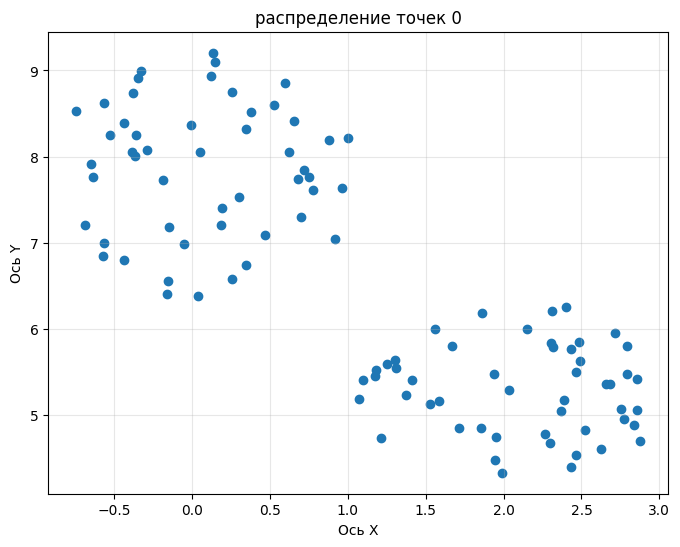

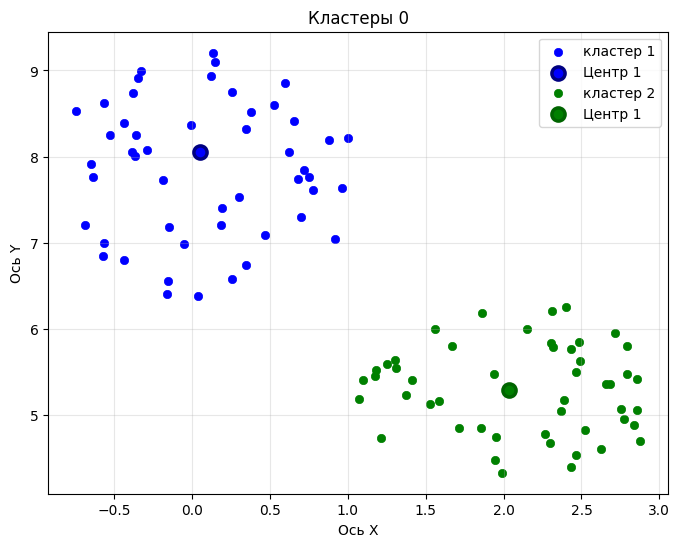

центр кластера 1: 0.0481115536116194 8.0530509124927
центр кластера 2: 2.03390100209471 5.28929590079911
Усреднение умножить на 1000: 1041.0062778531646 6671.173406645906


In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

def find_medoid(points):
    dist_matrix = cdist(points, points, metric='euclidean')
    
    sum_distances = np.sum(dist_matrix, axis=1)
    
    medoid_idx = np.argmin(sum_distances)
    
    return points[medoid_idx], medoid_idx

df = pd.read_excel('0.xls')
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.title('распределение точек 0')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.show()

xy = df.to_numpy()
clast1x, clast1y, clast2x, clast2y = [], [], [], []

mask_x = xy[:, 0] <= 1.1
mask_y = xy[:, 1] > 6.0 

comb_mask = mask_x & mask_y

clst1 = xy[comb_mask]
clst2 = xy[comb_mask == 0]
clast1x = clst1[:, 0]
clast1y = clst1[:, 1]
clast2x = clst2[:, 0]
clast2y = clst2[:, 1]

center1 = find_medoid(clst1)
center2 = find_medoid(clst2)
plt.figure(figsize=(8, 6))
plt.scatter(clast1x, clast1y, c='blue', linewidth=0.5, label='кластер 1')
plt.scatter(center1[0][0], center1[0][1],  c='blue', edgecolors='navy', linewidths=2.5,s=90, zorder=10, label='Центр 1')
plt.scatter(clast2x, clast2y, c='green', linewidth=0.5, label='кластер 2')
plt.scatter(center2[0][0], center2[0][1],  c='green', edgecolors='darkgreen', linewidths=2.5,s=90, zorder=10, label='Центр 1')

plt.title('Кластеры 0')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


print(f"центр кластера 1: {center1[0][0]} {center1[0][1]}")
print(f"центр кластера 2: {center2[0][0]} {center2[0][1]}")

print("Усреднение умножить на 1000:", *((center1[0] + center2[0]) / 2 * 1000))


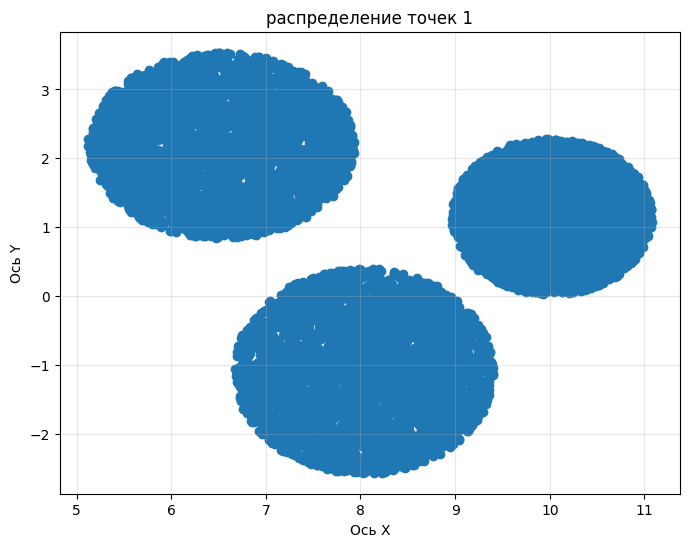

центр кластера 1: 6.46998257368897 2.16976099669024
центр кластера 2: 8.04007453084081 -1.10870556888781
центр кластера 3: 10.0225353109378 1.15420059917185


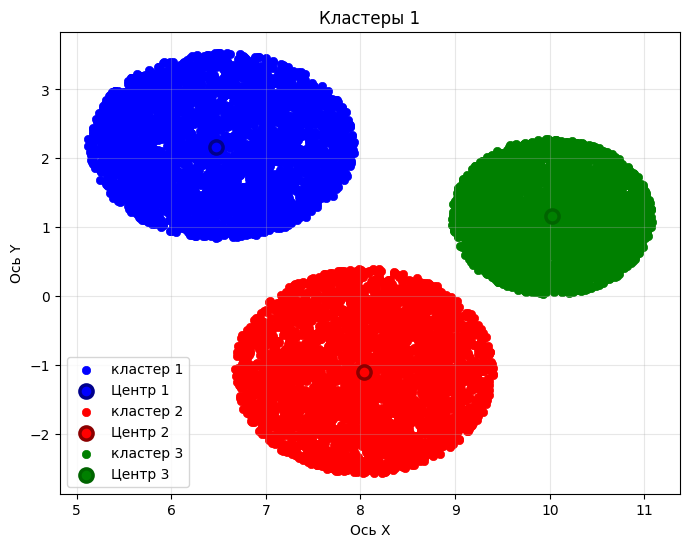

Усреднение умножить на 1000: [8177.53080516  738.41867566]


In [233]:
df = pd.read_excel('1.xls')
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.title('распределение точек 1')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.show()

xy = df.to_numpy()
pts = [(6.5, 2.5), (8, -1), (10, 1)]
idx = np.array([np.argmin(cdist(pts, np.array([i]))) for i in xy])
plt.figure(figsize=(8, 6))
clr = ["blue", "red", "green"]
clr1 = ["darkblue", "darkred", "darkgreen"]
p = np.array([0, 0])
for i in range(3):
    clst = xy[idx == i]
    cntr = find_medoid(clst)
    plt.scatter(clst[:, 0], clst[:, 1], c=clr[i], linewidth=0.5, label=f'кластер {i + 1}')
    plt.scatter(cntr[0][0], cntr[0][1],  c=clr[i], edgecolors=clr1[i], linewidths=2.5,s=90, zorder=10, label=f'Центр {i + 1}')
    print(f"центр кластера {i + 1}: {cntr[0][0]} {cntr[0][1]}")
    p = p + cntr[0]


plt.title('Кластеры 1')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Усреднение умножить на 1000:", 1000 * (p / 3))


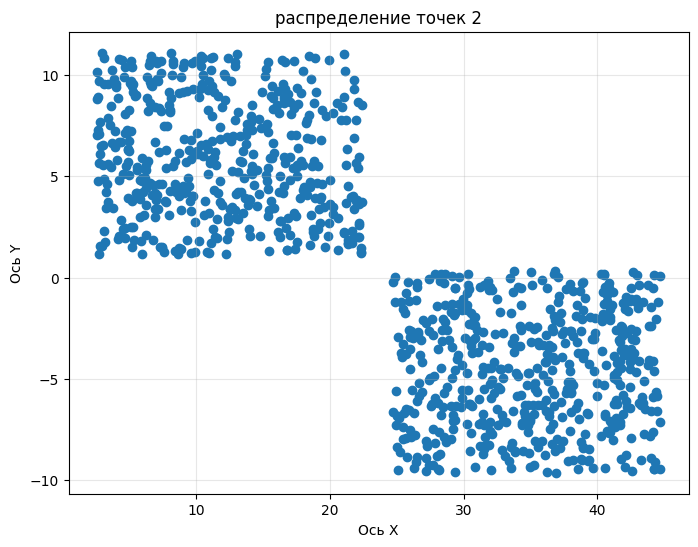

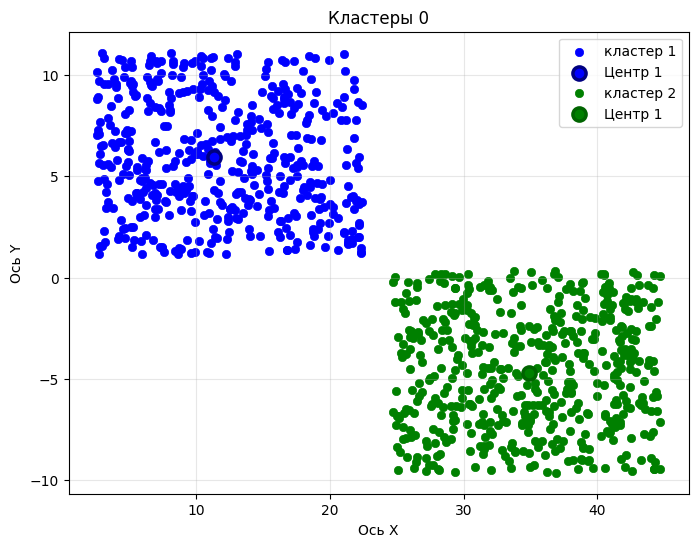

центр кластера 1: 11.33408020339 5.96596108062826
центр кластера 2: 34.9263513155908 -4.6952764918914
Усреднение умножить на 1000: 23130.215759490402 635.3422943684297


In [234]:
df = pd.read_excel('2.xlsx', engine='openpyxl')
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.title('распределение точек 2')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.show()

xy = df.to_numpy()
clast1x, clast1y, clast2x, clast2y = [], [], [], []


comb_mask = xy[:, 0] <=24
clst1 = xy[comb_mask]
clst2 = xy[comb_mask == 0]
clast1x = clst1[:, 0]
clast1y = clst1[:, 1]
clast2x = clst2[:, 0]
clast2y = clst2[:, 1]

center1 = find_medoid(clst1)
center2 = find_medoid(clst2)
plt.figure(figsize=(8, 6))
plt.scatter(clast1x, clast1y, c='blue', linewidth=0.5, label='кластер 1')
plt.scatter(center1[0][0], center1[0][1],  c='blue', edgecolors='navy', linewidths=2.5,s=90, zorder=10, label='Центр 1')
plt.scatter(clast2x, clast2y, c='green', linewidth=0.5, label='кластер 2')
plt.scatter(center2[0][0], center2[0][1],  c='green', edgecolors='darkgreen', linewidths=2.5,s=90, zorder=10, label='Центр 1')

plt.title('Кластеры 0')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


print(f"центр кластера 1: {center1[0][0]} {center1[0][1]}")
print(f"центр кластера 2: {center2[0][0]} {center2[0][1]}")

print("Усреднение умножить на 1000:", *((center1[0] + center2[0]) / 2 * 1000))


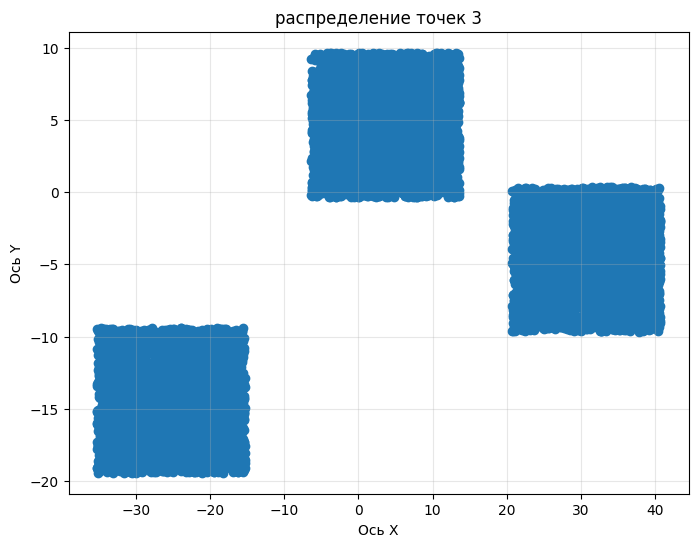

центр кластера 1: -25.1307584045602 -14.4133283639855
центр кластера 2: 3.51791128381387 4.65369555801186
центр кластера 3: 30.8495291640572 -4.51720290933603


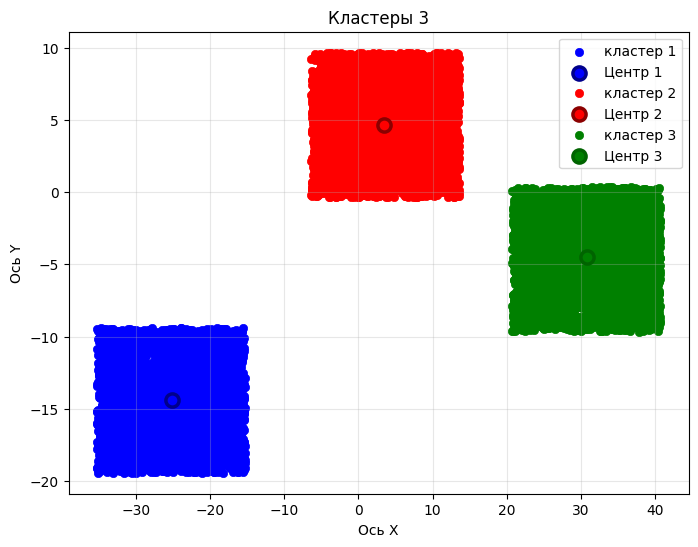

Усреднение умножить на 1000: [ 3078.89401444 -4758.94523844]


In [235]:
def find_medoid(points):
    dist_matrix = cdist(points, points, metric='cityblock') # манхетенское
    
    sum_distances = np.sum(dist_matrix, axis=1)
    
    medoid_idx = np.argmin(sum_distances)
    
    return points[medoid_idx], medoid_idx

df = pd.read_excel('3.xlsx', engine='openpyxl')
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.title('распределение точек 3')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.show()

xy = df.to_numpy()
pts = [(-25, -15), (5, 5), (30, -5)]
idx = np.array([np.argmin(cdist(pts, np.array([i]))) for i in xy])
plt.figure(figsize=(8, 6))
clr = ["blue", "red", "green"]
clr1 = ["darkblue", "darkred", "darkgreen"]
p = np.array([0, 0])
for i in range(3):
    clst = xy[idx == i]
    cntr = find_medoid(clst)
    plt.scatter(clst[:, 0], clst[:, 1], c=clr[i], linewidth=0.5, label=f'кластер {i + 1}')
    plt.scatter(cntr[0][0], cntr[0][1],  c=clr[i], edgecolors=clr1[i], linewidths=2.5,s=90, zorder=10, label=f'Центр {i + 1}')
    print(f"центр кластера {i + 1}: {cntr[0][0]} {cntr[0][1]}")
    p = p + cntr[0]


plt.title('Кластеры 3')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Усреднение умножить на 1000:", 1000 * (p / 3))


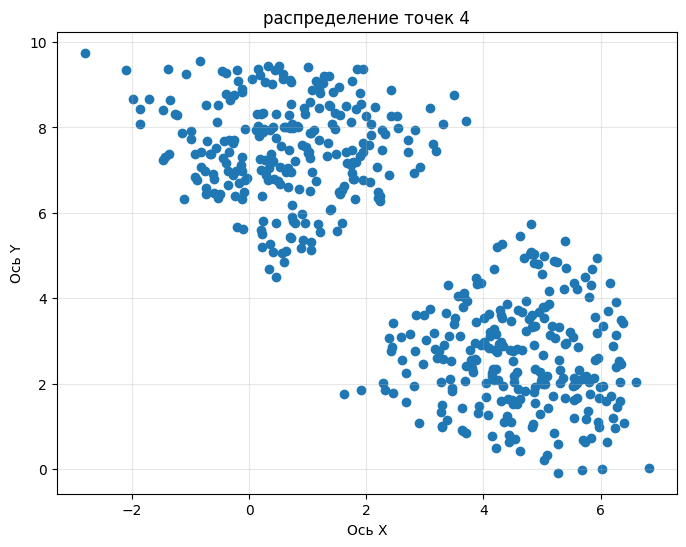

центр кластера 1: 4.4992892332316 2.5248135549032
центр кластера 2: 0.67779061055821 7.4683214519915


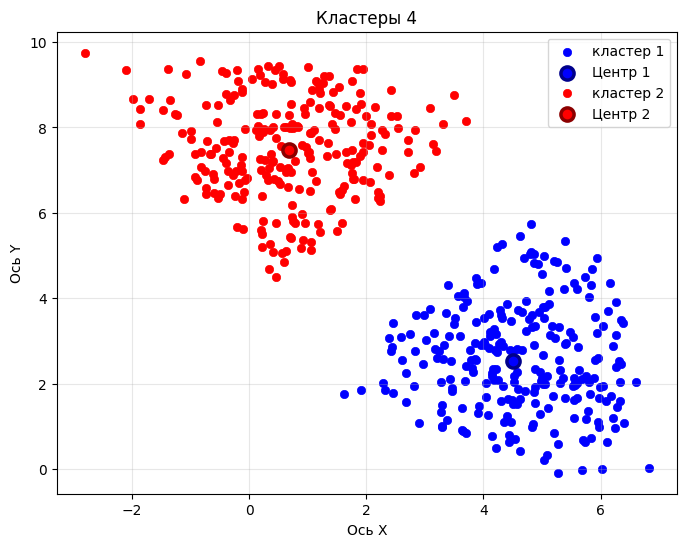

Усреднение умножить на 1000: [2588.53992189 4996.56750345]


In [236]:
df = pd.read_excel('4.xlsx', engine='openpyxl')
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.title('распределение точек 4')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.show()

xy = df.to_numpy()
idx = np.array([i[1] - i[0] >= 2 for i in xy])
plt.figure(figsize=(8, 6))
clr = ["blue", "red", "green"]
clr1 = ["darkblue", "darkred", "darkgreen"]
p = np.array([0, 0])
for i in range(2):
    clst = xy[idx == i]
    cntr = find_medoid(clst)
    plt.scatter(clst[:, 0], clst[:, 1], c=clr[i], linewidth=0.5, label=f'кластер {i + 1}')
    plt.scatter(cntr[0][0], cntr[0][1],  c=clr[i], edgecolors=clr1[i], linewidths=2.5,s=90, zorder=10, label=f'Центр {i + 1}')
    print(f"центр кластера {i + 1}: {cntr[0][0]} {cntr[0][1]}")
    p = p + cntr[0]


plt.title('Кластеры 4')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Усреднение умножить на 1000:", 1000 * (p / 2))


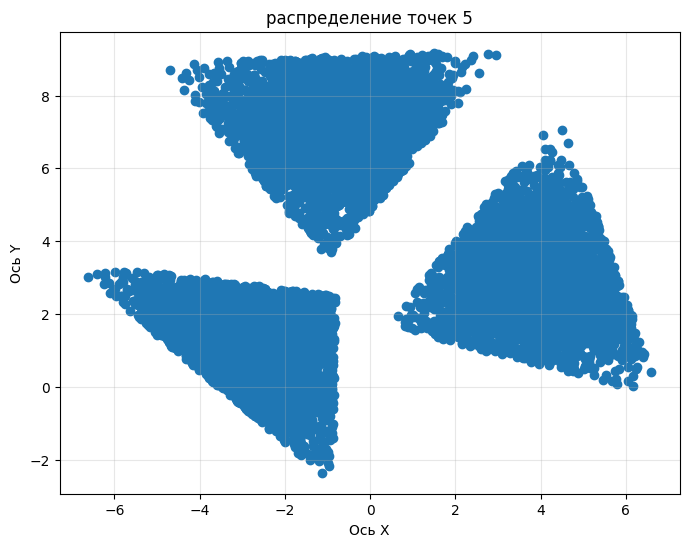

центр кластера 1: -0.87013400061204 7.2071866659725
центр кластера 2: 3.9127009140372 2.8856722664607
центр кластера 3: -2.6839301678778 1.2823609739042


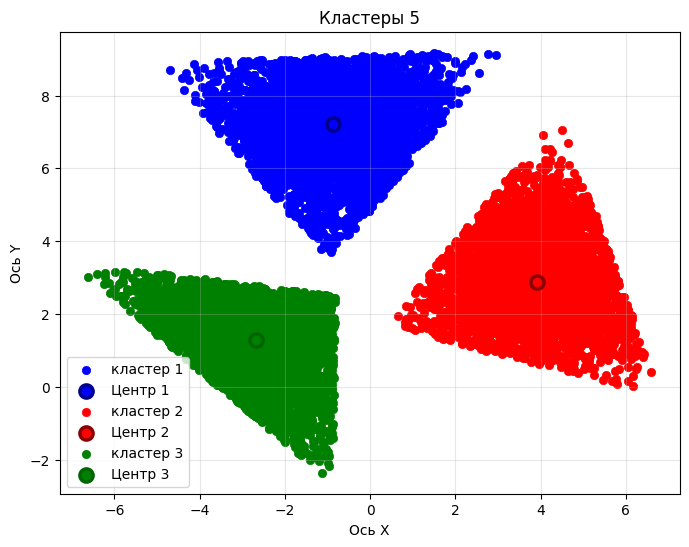

Усреднение умножить на 1000: [ 119.54558185 3791.73996878]


In [237]:
df = pd.read_excel('5.xlsx', engine='openpyxl')
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.title('распределение точек 5')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.show()
def f(p):
    if p[0] >= 0:
        if p[1] - p[0] * 1.1 > 2.5:
            return 0
        return 1
    else:
        if p[1] > 3.6:
            return 0
        return 2

xy = df.to_numpy()
idx = np.array([f(i) for i in xy])
plt.figure(figsize=(8, 6))
clr = ["blue", "red", "green"]
clr1 = ["darkblue", "darkred", "darkgreen"]
p = np.array([0, 0])
for i in range(3):
    clst = xy[idx == i]
    cntr = find_medoid(clst)
    plt.scatter(clst[:, 0], clst[:, 1], c=clr[i], linewidth=0.5, label=f'кластер {i + 1}')
    plt.scatter(cntr[0][0], cntr[0][1],  c=clr[i], edgecolors=clr1[i], linewidths=2.5,s=90, zorder=10, label=f'Центр {i + 1}')
    print(f"центр кластера {i + 1}: {cntr[0][0]} {cntr[0][1]}")
    p = p + cntr[0]


plt.title('Кластеры 5')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Усреднение умножить на 1000:", 1000 * (p / 3))


# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [238]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [239]:
n_clusters = 3
two_means = cluster.MiniBatchKMeans(
    n_clusters=n_clusters,
    batch_size=100,  # Размер мини-батча
    n_init=3,        # Количество запусков с разными начальными центрами
    random_state=0
)

dbscan = cluster.DBSCAN(
    eps=0.3,          # Максимальное расстояние между точками одного кластера
    min_samples=5     # Минимальное количество точек для образования кластера
)

clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("DBSCAN", dbscan),
    )

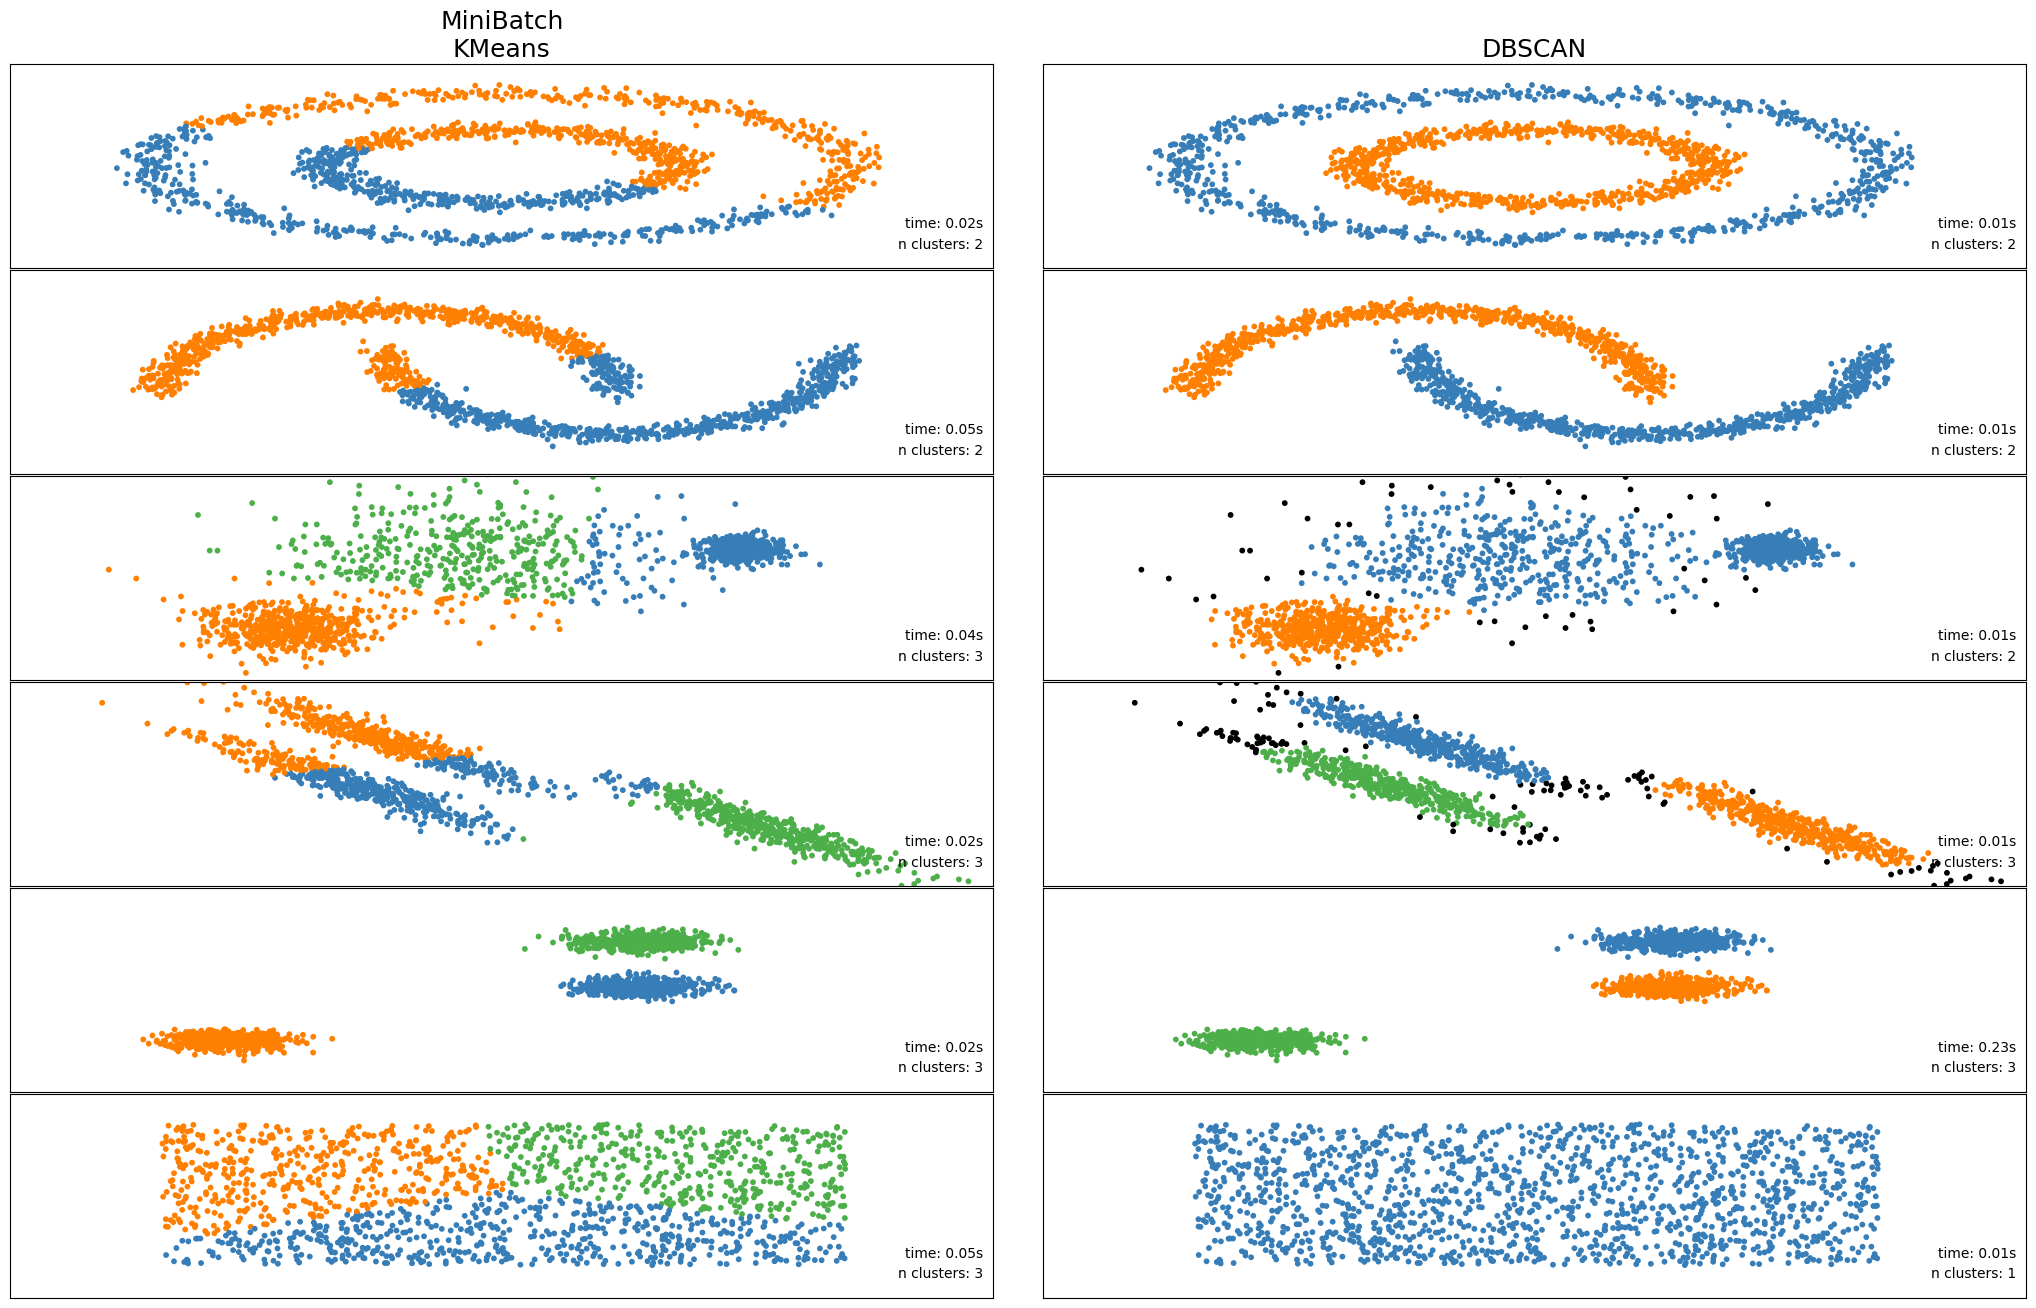

In [240]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"], 
        batch_size=100,
        random_state=0
        )

    dbscan = cluster.DBSCAN(
        eps=params["eps"],
        min_samples=params["min_samples"]
        )

    clustering_algorithms = (
            ("MiniBatch\nKMeans", two_means),
            ("DBSCAN", dbscan),
        )
    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        algorithm.fit(X)
        
        t1 = time.time()
        
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)
        
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        
        colors = np.array(list(islice(cycle([
            '#377eb8', '#ff7f00', '#4daf4a'
        ]), int(max(y_pred) + 1))))
        
        # черный - шум
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        
        plt.text(0.99, 0.2, f'time: {(t1-t0):.2f}s',
                transform=plt.gca().transAxes,
                horizontalalignment='right')
        plt.text(0.99, 0.1, f'n clusters: {max(y_pred + 1)}',
                transform=plt.gca().transAxes,
                horizontalalignment='right')
        if i_dataset == 0:
            plt.title(name, size=18)
        
        plot_num += 1

plt.show()